Summary Statistics and Missing value report

In [1]:
import pandas as pd

file_path = "datasets/togo-dapaong_qc.csv"
df = pd.read_csv(file_path)

df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
print(df.describe())

#missing values
missing = df.isna().sum()
missing_percent = (missing/len(df))*100
print("columns with >5% missing values:")
print(missing_percent[missing_percent>5])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

Outlier detection and basic cleaning

In [3]:
from scipy.stats import zscore
import numpy as np

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols_to_check].apply(zscore)

# Flag rows with |Z| > 3
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Outlier rows:")
print(df[outliers])

# Drop or impute missing values
df[cols_to_check] = df[cols_to_check].fillna(df[cols_to_check].median())


Outlier rows:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
4985    2021-10-28 11:06  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8   
5410    2021-10-28 18:11    -1.2    0.0    0.0     0.0     0.0  29.7  63.5   
5411    2021-10-28 18:12    -1.0    0.0    0.0     0.0     0.0  29.3  62.4   
5413    2021-10-28 18:14    -0.8    0.0    0.0     0.0     0.0  28.6  63.7   
5420    2021-10-28 18:21    -1.3    0.0    0.0     0.0     0.0  27.7  64.5   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
510473  2022-10-14 11:54   709.5   63.7  629.8   703.1   694.9  30.2  66.6   
510474  2022-10-14 11:55   677.8   40.6  621.7   670.1   662.2  30.2  66.7   
510475  2022-10-14 11:56   659.5   29.7  614.9   651.0   643.4  30.3  66.1   
510476  2022-10-14 11:57   660.1   40.7  605.6   653.2   645.6  30.2  66.0   
510477  2022-10-14 11:58   655.8   50.2  591.0   647.5   639.9  30.2  66.2   

         WS  WSgust  WSstdev     WD  WDstdev   BP

In [4]:
import os

os.makedirs('data', exist_ok=True)
df.to_csv('data/togo_clean.csv', index=False)


TIME SERIES ANALYSIS

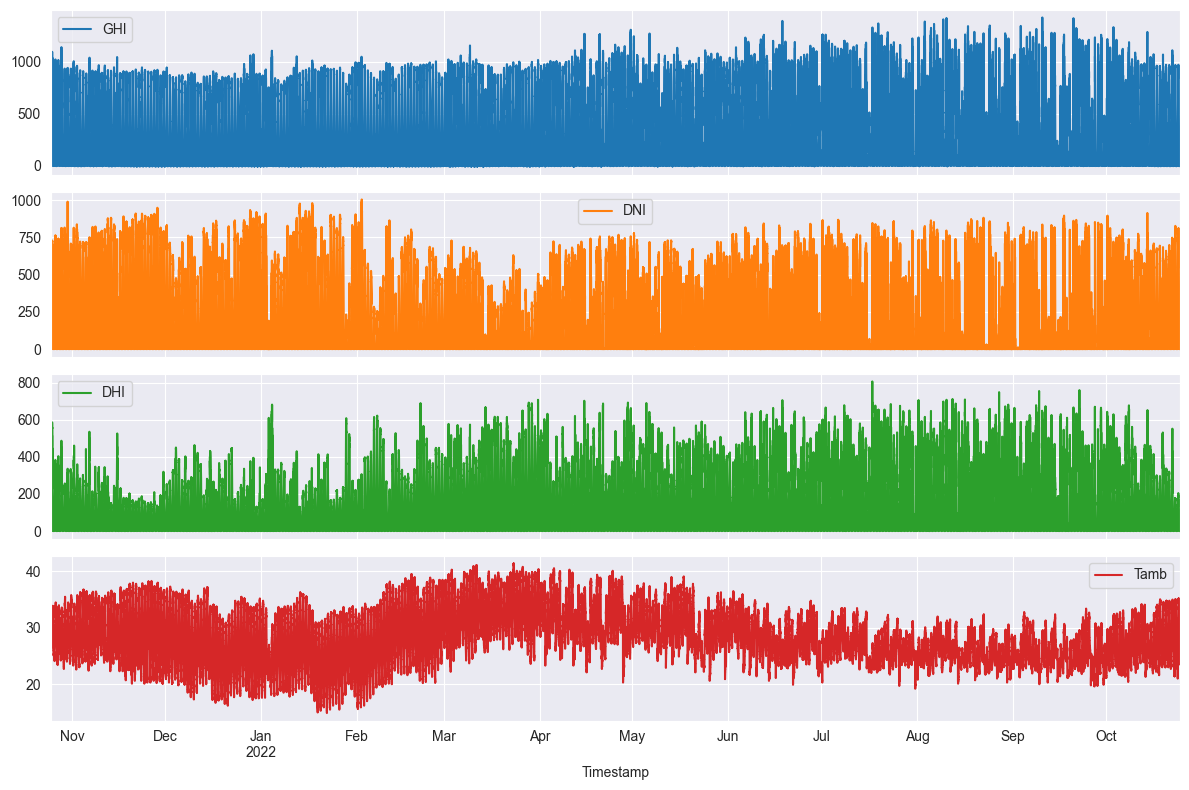

In [5]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()


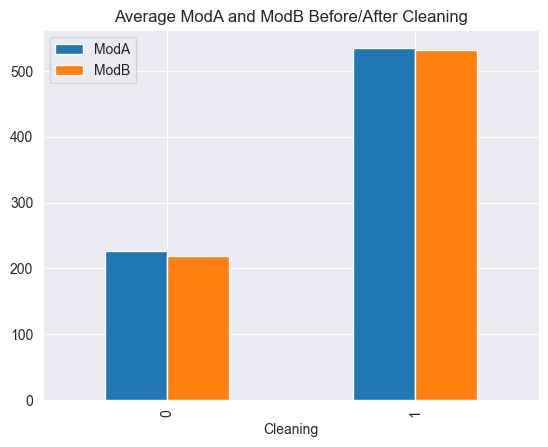

In [6]:
# Assuming you have a 'Cleaning' flag column
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Average ModA and ModB Before/After Cleaning')
plt.show()


Correlation and relationship summary


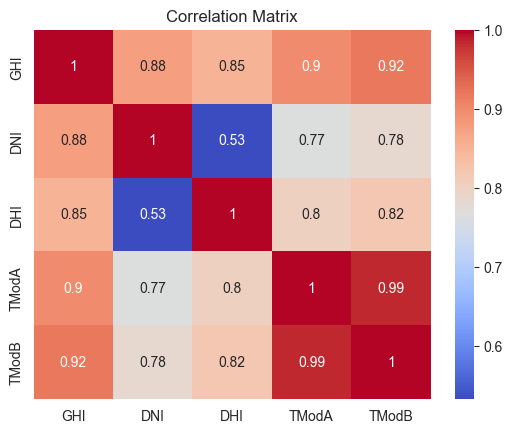

<Axes: xlabel='WS', ylabel='GHI'>

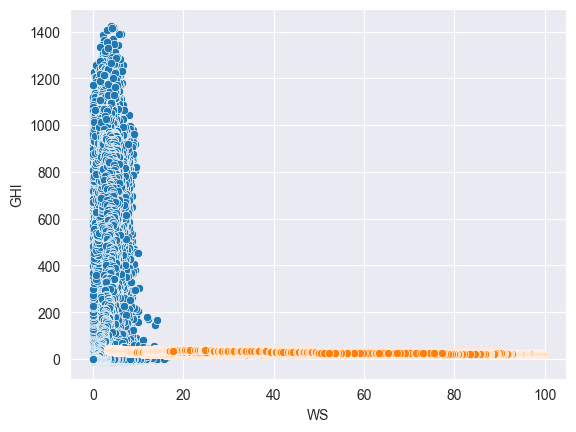

In [7]:
import seaborn as sns

# Heatmap
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
sns.scatterplot(data=df, x='WS', y='GHI')
sns.scatterplot(data=df, x='RH', y='Tamb')


wind and distribution analysis

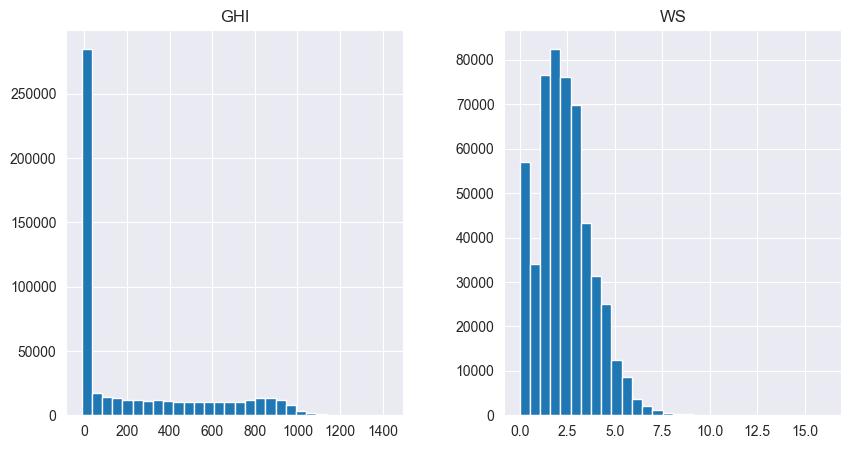

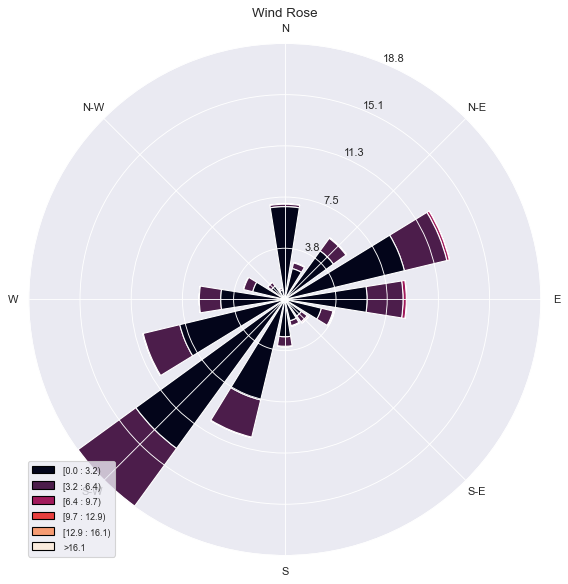

In [8]:
# Histograms
df[['GHI', 'WS']].hist(bins=30, figsize=(10, 5))
plt.show()


from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose")
plt.show()


Temperature and RH influence

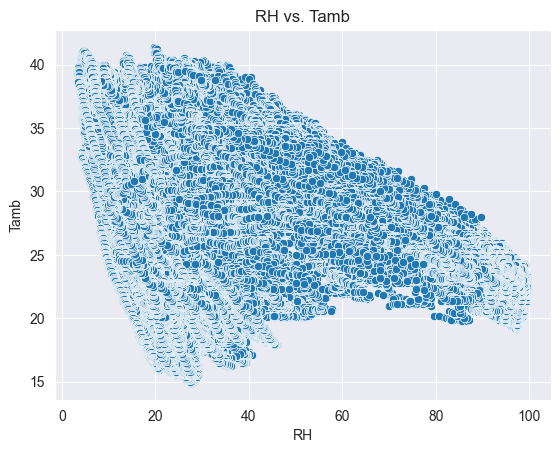

In [9]:
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("RH vs. Tamb")
plt.show()


Bubble chart

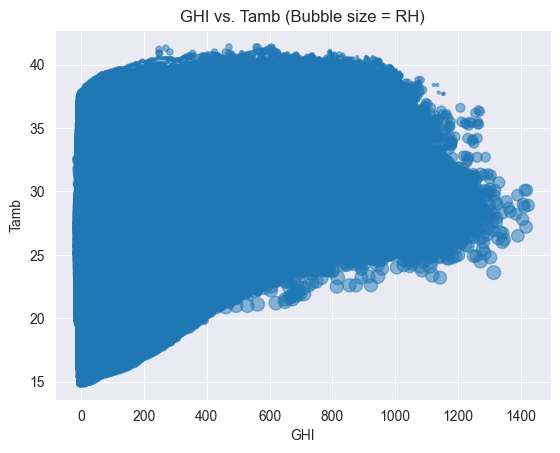

In [10]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs. Tamb (Bubble size = RH)')
plt.show()
